In [60]:
import numpy as np # linear algebra
import pandas as pd # data processing,
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [61]:
data=pd.read_csv("/Users/ped/Downloads/archive/Amazon Sale Report.csv")

/var/folders/gb/1hpzb2cs5zv7rm95tkw7jfj00000gp/T/ipykernel_6865/1627489464.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv("/Users/ped/Downloads/archive/Amazon Sale Report.csv")


In [62]:
data.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')

In [63]:
data.shape

(128975, 24)

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [65]:
data.describe()

,index,Qty,Amount,ship-postal-code
count,128975.000000,128975.000000,121180.000000,128942.000000
mean,64487.000000,0.904431,648.561465,463966.236509
std,37232.019822,0.313354,281.211687,191476.764941
min,0.000000,0.000000,0.000000,110001.000000
25%,32243.500000,1.000000,449.000000,382421.000000
50%,64487.000000,1.000000,605.000000,500033.000000
75%,96730.500000,1.000000,788.000000,600024.000000
max,128974.000000,15.000000,5584.000000,989898.000000


In [66]:
data.nunique().to_frame(name='Count of unique values')

,Count of unique values
index,128975
Order ID,120378
Date,91
Status,13
Fulfilment,2
Sales Channel,2
ship-service-level,2
Style,1377
SKU,7195
Category,9


In [67]:
data.apply(pd.unique).to_frame(name='Unique Values')

,Unique Values
index,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
Order ID,"[405-8078784-5731545, 171-9198151-1101146, 404..."
Date,"[04-30-22, 04-29-22, 04-28-22, 04-27-22, 04-26..."
Status,"[Cancelled, Shipped - Delivered to Buyer, Ship..."
Fulfilment,"[Merchant, Amazon]"
Sales Channel,"[Amazon.in, Non-Amazon]"
ship-service-level,"[Standard, Expedited]"
Style,"[SET389, JNE3781, JNE3371, J0341, JNE3671, SET..."
SKU,"[SET389-KR-NP-S, JNE3781-KR-XXXL, JNE3371-KR-X..."
Category,"[Set, kurta, Western Dress, Top, Ethnic Dress,..."


import seaborn as sns
import matplotlib.pyplot as plt
numeric_cols = data.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_cols.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [68]:
data.isnull().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
Unnamed: 22           49050
dtype: int64

In [69]:

data.drop(columns=['index', 'Unnamed: 22', 'fulfilled-by', 'ship-country', 'currency', 'Sales Channel ', 'promotion-ids', 'ship-postal-code', 'ship-state', 'ship-city', 'Courier Status', 'Fulfilment', 'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN', 'Qty', 'B2B'], inplace=True)


In [70]:
data.isnull().sum()

Order ID       0
Date           0
Status         0
Amount      7795
dtype: int64

In [71]:
data['Amount'].fillna(0, inplace = True)

In [72]:
data.isnull().sum()

Order ID    0
Date        0
Status      0
Amount      0
dtype: int64

In [73]:
data.duplicated().sum()

1460

In [74]:
data.drop_duplicates(inplace = True)
data.duplicated().sum()

0

In [75]:
# Convert INR to USD using an exchange rate of 1 INR = 0.014 USD
exchange_rate = 0.0120988
data['Amount '] = data['Amount'].apply(lambda x: x * exchange_rate)

In [76]:
data = data[data['Status'].isin(['Shipped', 'Shipped - Delivered to Buyer'])]
data.tail()

,Order ID,Date,Status,Amount,Amount
128970,406-6001380-7673107,05-31-22,Shipped,517.0,6.255080
128971,402-9551604-7544318,05-31-22,Shipped,999.0,12.086701
128972,407-9547469-3152358,05-31-22,Shipped,690.0,8.348172
128973,402-6184140-0545956,05-31-22,Shipped,1199.0,14.506461
128974,408-7436540-8728312,05-31-22,Shipped,696.0,8.420765


In [21]:
data['Date'] = pd.to_datetime(data['Date'], format='%m-%d-%y')
data['month'] = data['Date'].dt.month
data['month'].unique()

array([4, 3, 5, 6], dtype=int32)

In [22]:
#changing months to numerical to be use in graph
months = ['march','April', 'May', 'June']
data['month'].replace([3,4,5,6],months, inplace = True)

In [23]:
print(f'The earliest date is {data["Date"].min()}')
print(f'The latest date is {data["Date"].max()}')

The earliest date is 2022-03-31 00:00:00
The latest date is 2022-06-29 00:00:00


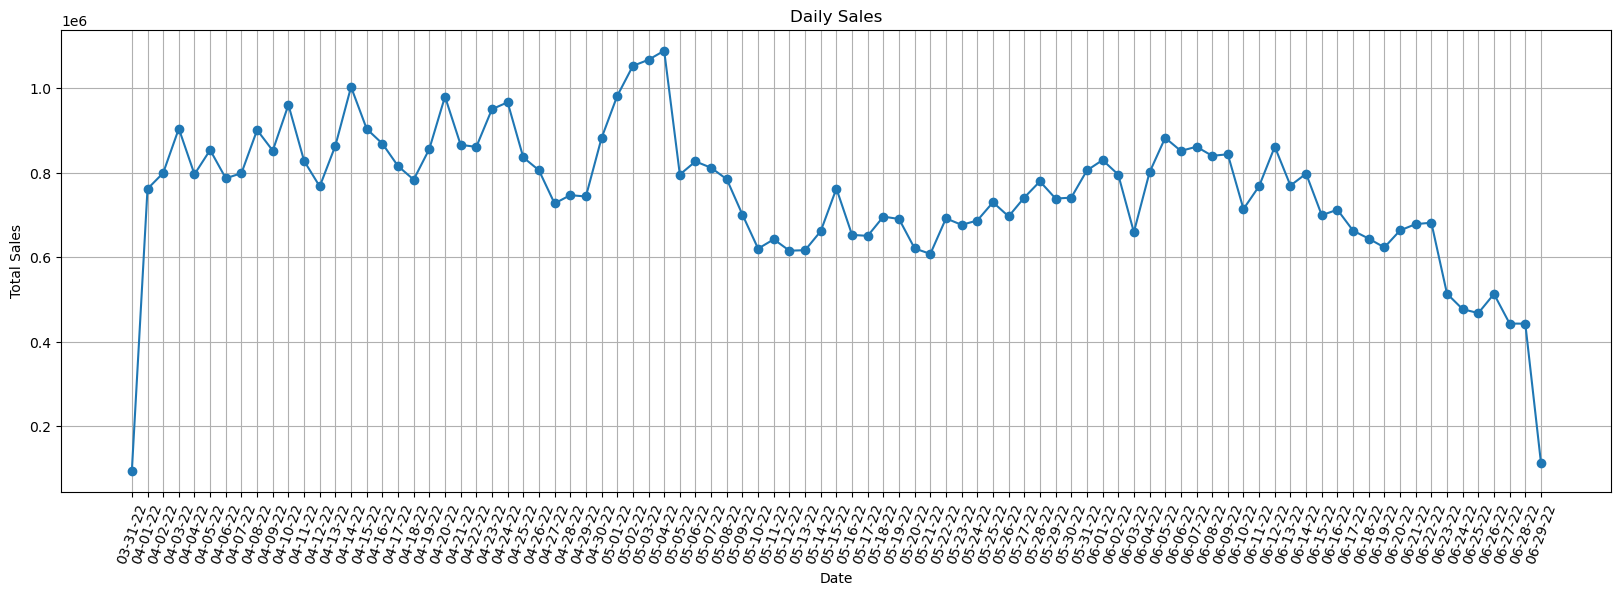

In [83]:
# 2. Monthly Sales Distribution (Line Plot)
monthly_sales = data.groupby('Date')['Amount'].sum()
plt.figure(figsize=(20, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-')
plt.title('Daily Sales')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.xticks(rotation=70)

plt.show()


In [36]:
# Define Augmented Dickey-Fuller (ADF) test function
def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)

# Apply the ADF test to your time series data
adf_test(ts)


Results of Dickey-Fuller Test:
Test Statistic                    -35.811655
p-value                             0.000000
#Lags Used                         61.000000
Number of Observations Used    105522.000000
Critical Value (1%)                -3.430412
Critical Value (5%)                -2.861567
Critical Value (10%)               -2.566785
dtype: float64


In [37]:
# Difference the data
diff = np.diff(ts)
# Create a pandas series object from the differenced time-series data
diff_ts = pd.Series(diff, index=ts.index[:-1])
# Test the difference data for stationarity
adf_test(diff_ts)

Results of Dickey-Fuller Test:
Test Statistic                    -66.946312
p-value                             0.000000
#Lags Used                         69.000000
Number of Observations Used    105513.000000
Critical Value (1%)                -3.430412
Critical Value (5%)                -2.861567
Critical Value (10%)               -2.566785
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                    -66.946312
p-value                             0.000000
#Lags Used                         69.000000
Number of Observations Used    105513.000000
Critical Value (1%)                -3.430412
Critical Value (5%)                -2.861567
Critical Value (10%)               -2.566785
dtype: float64


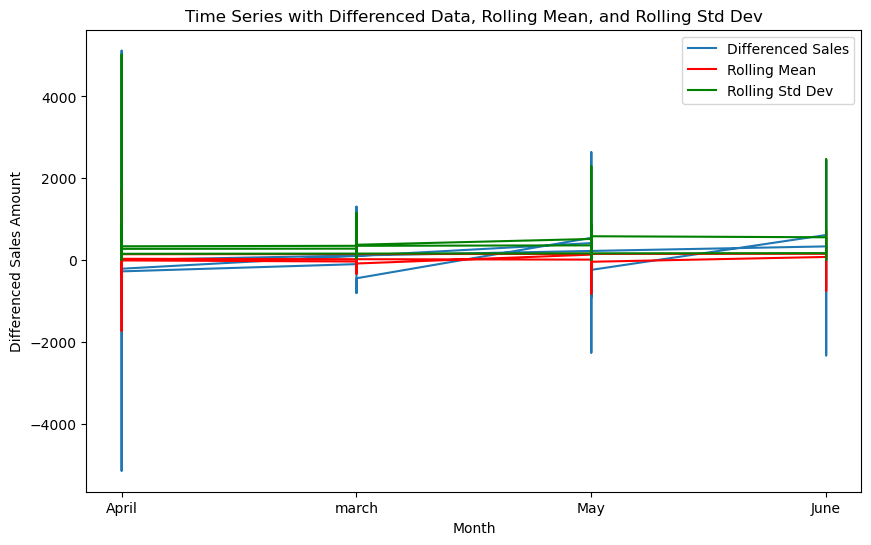

In [54]:
#Rolling Statistics:
#Calculate and plot rolling statistics (e.g., moving averages) to smooth out noise and identify trends more easily.
# Rolling mean and standard deviation
rolling_mean = diff_ts.rolling(window=3).mean()
rolling_std = diff_ts.rolling(window=3).std()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(diff_ts, label='Differenced Sales')
plt.plot(rolling_mean, label='Rolling Mean', color='red')
plt.plot(rolling_std, label='Rolling Std Dev', color='green')
plt.title('Time Series with Differenced Data, Rolling Mean, and Rolling Std Dev')
plt.xlabel('Month')
plt.ylabel('Differenced Sales Amount')
plt.legend()
plt.show()

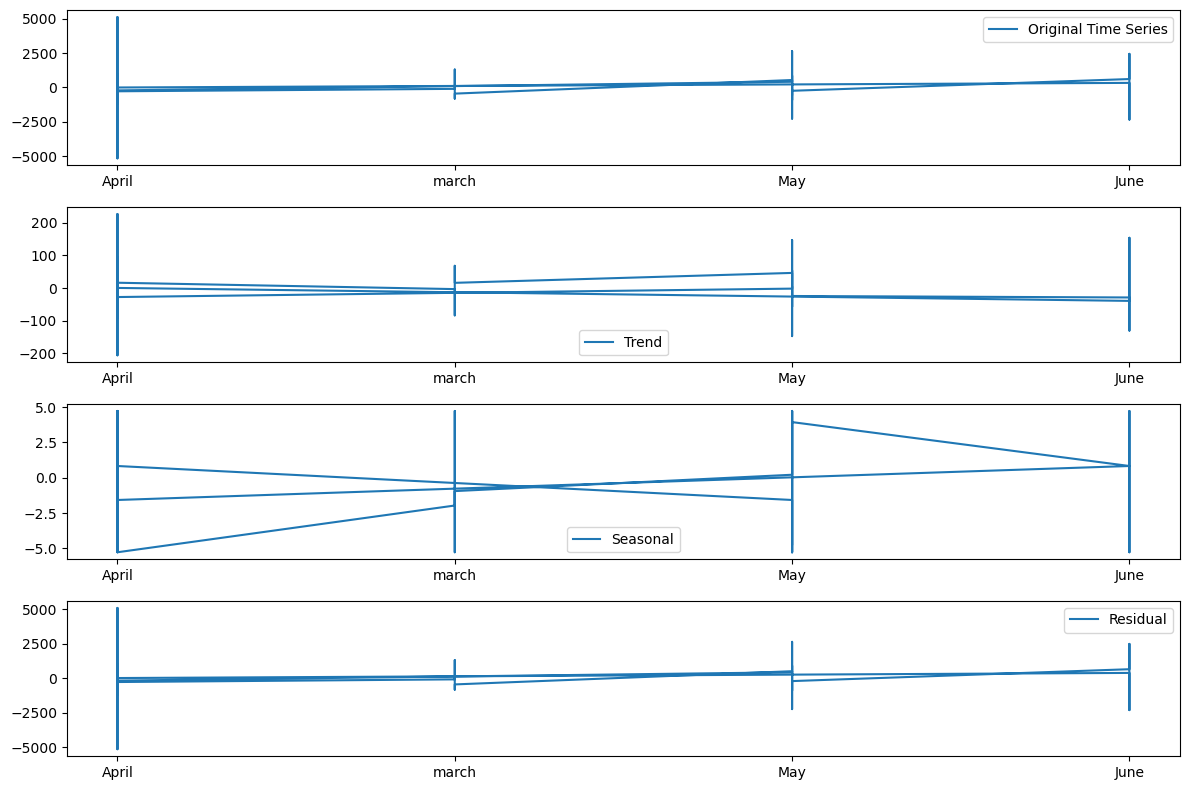

In [58]:
#Decomposition:
#Decompose the time series into trend, seasonality, and residual components.

from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(diff_ts, model='additive', period=12)  # Adjust the period based on your data's seasonality

# Plotting
plt.figure(figsize=(12, 8))

# Original time series
plt.subplot(4, 1, 1)
plt.plot(diff_ts, label='Original Time Series')
plt.legend()

# Trend component
plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend')
plt.legend()

# Seasonal component
plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonal')
plt.legend()

# Residual component
plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residual')
plt.legend()

plt.tight_layout()
plt.show()

In [59]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(diff_ts, trace=True, supress_warnings=True)

Performing stepwise search to minimize aic



KeyboardInterrupt



In [ ]:
stepwise_fit.summary()

In [ ]:
# Visualize the acf and pacf plots
fig, ax = plt.subplots(2)
plot_acf(ts, lags=55, ax=ax[0])
plot_pacf(ts, lags=55, ax=ax[1])
plt.show()

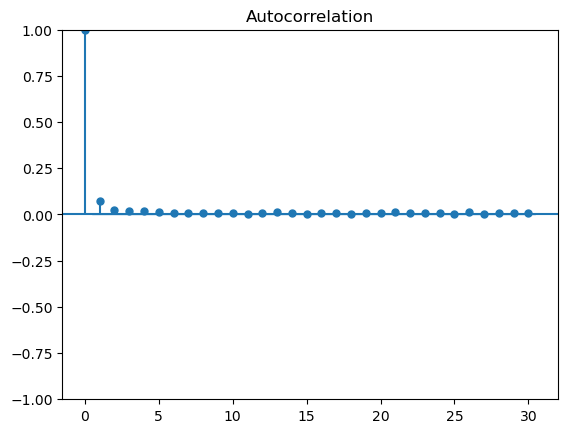

In [31]:
#Plot the ACF to identify the seasonality pattern.

from statsmodels.graphics.tsaplots import plot_acf

plot_acf(data['Amount'], lags=30)
plt.show()

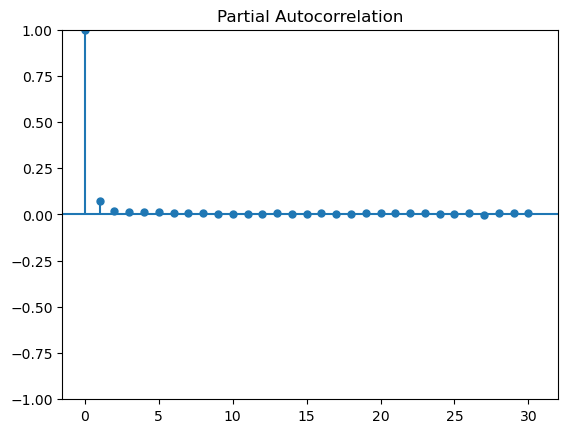

In [32]:
#Autocorrelation Analysis:
#Partial Autocorrelation Function (PACF):
#Plot the PACF to identify significant lags in the autocorrelation.

from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(data['Amount'], lags=30)
plt.show()


In [ ]:
# Check for missing data
#print(df.isnull().sum())
#After finding no missing data, we performed the Augment Dickey-Fuller (ADF) test to check for stationarity.

In [ ]:
#Augmented Dickey-Fuller Test:
#Conduct the Augmented Dickey-Fuller test to check for stationarity in the time series.
# Define Augmented Dickey-Fuller (ADF) test function as per statsmodels



Results of Dickey-Fuller Test:
